<a href="https://colab.research.google.com/github/PMMaithBM11/RoboISM_OpenCV_Piyush-Mishra_21JE0654/blob/main/RoboISM__OpenCV_project_Piyush_Mishra_21JE0654_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [259]:
import cv2
import cv2 as cv
import numpy as np
import math

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


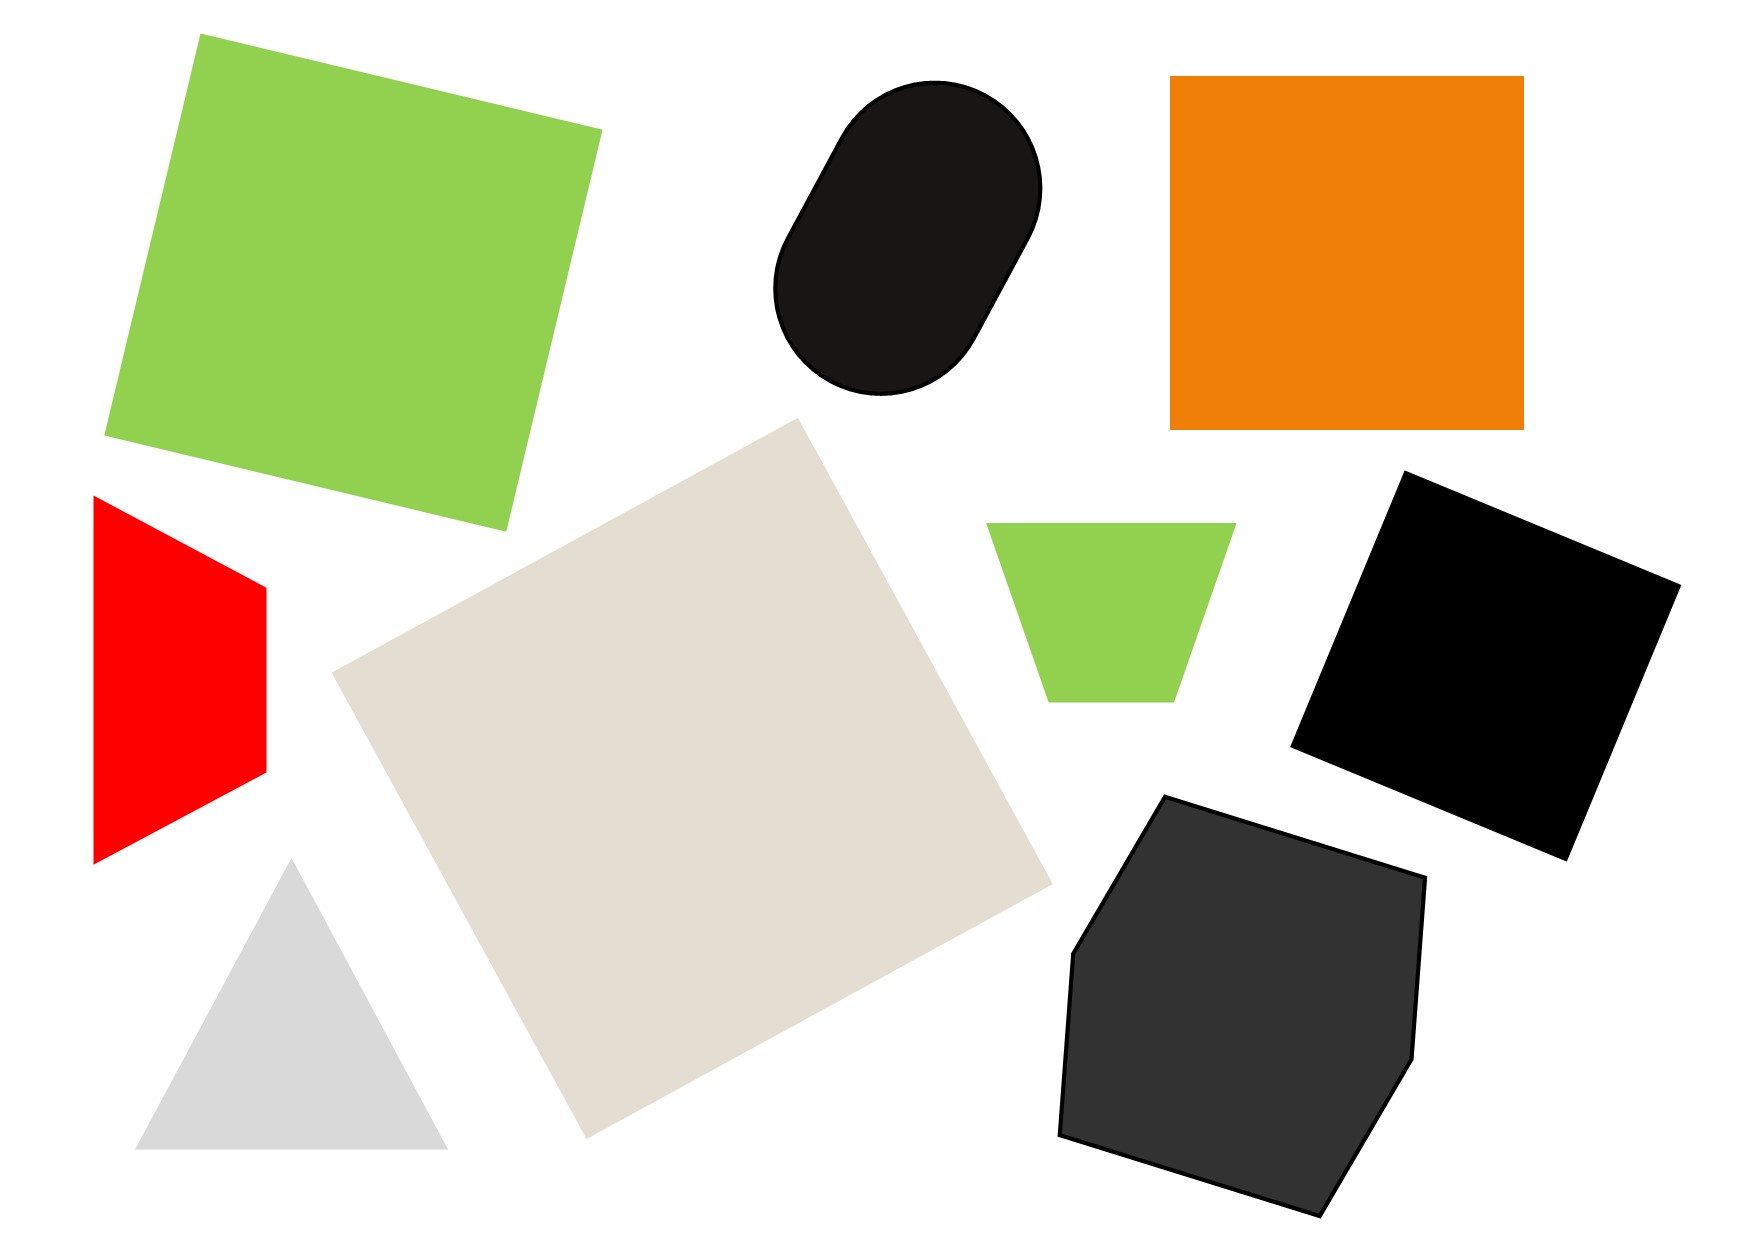

In [260]:
from google.colab import drive 
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')
path='/content/drive/My Drive/CV.jpg'
img=cv2.imread(path)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [261]:
img.shape

(1240, 1754, 3)

Resized Dimensions :  (558, 789, 3)


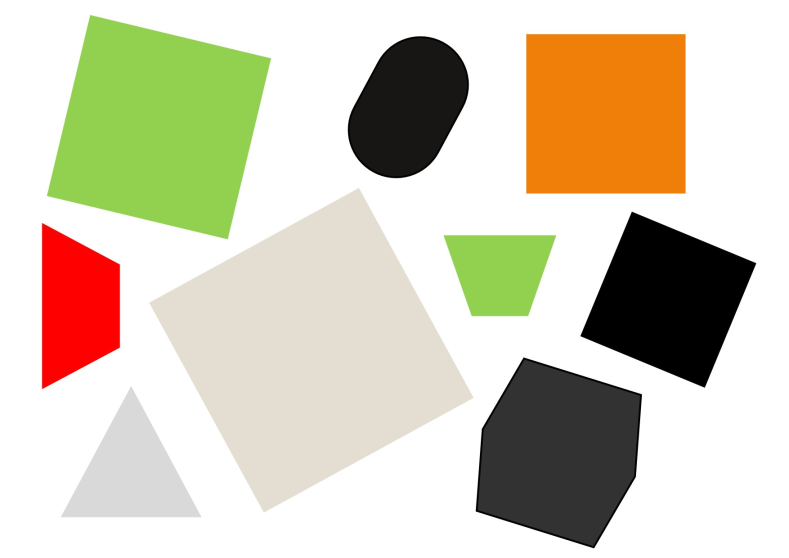

In [262]:

#Resizing the image 
scale_percent = 45 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',img.shape)
 
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [263]:
#Images containing the aruco markers
p1='/content/drive/My Drive/Ha.jpg'
p2='/content/drive/My Drive/HaHa.jpg'
p3='/content/drive/My Drive/LMAO.jpg'
p4='/content/drive/My Drive/XD.jpg'
ha=cv2.imread(p1)
haha=cv2.imread(p2)
lmao=cv2.imread(p3)
xd=cv2.imread(p4)




In [264]:
#Using predefined dictionary of 5X5 aruco markers for identification of our markers
dictionary = cv2.aruco.Dictionary_get(cv2.aruco.DICT_5X5_250)
parameters =  cv2.aruco.DetectorParameters_create()


In [265]:
#Creating a list of the markers in order of their corresponding IDs 
lst=[None]*5
# Detection of Marker ID of the marker
c,id,r=cv2.aruco.detectMarkers(ha,dictionary, parameters=parameters)
lst[id[0][0]]=ha
c,id,r=cv2.aruco.detectMarkers(haha,dictionary, parameters=parameters)
lst[id[0][0]]=haha
c,id,r=cv2.aruco.detectMarkers(lmao,dictionary, parameters=parameters)
lst[id[0][0]]=lmao
c,id,r=cv2.aruco.detectMarkers(xd,dictionary, parameters=parameters)
lst[id[0][0]]=xd

1


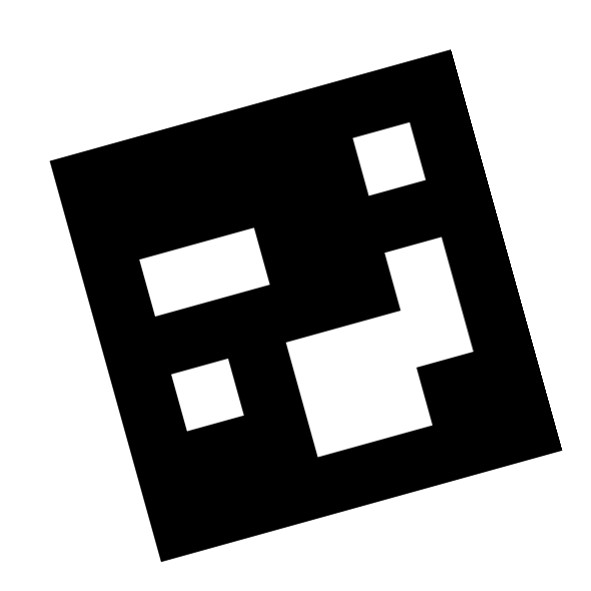

2


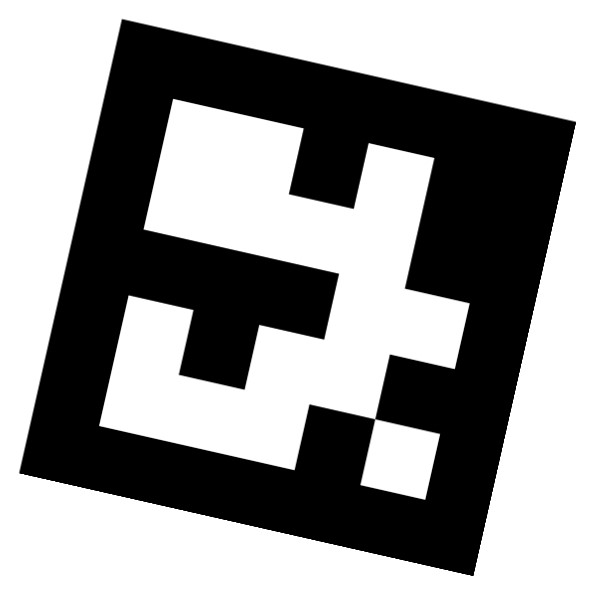

3


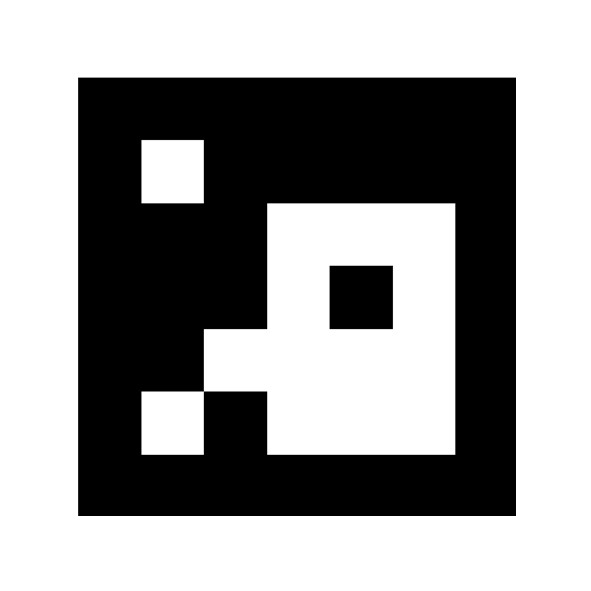

4


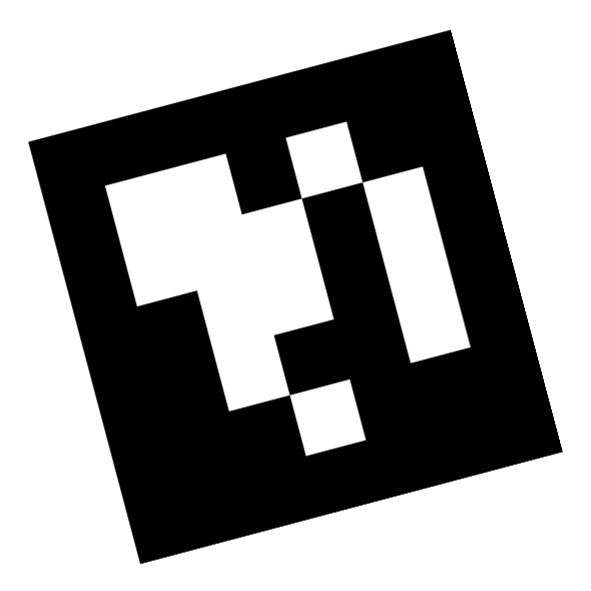

In [266]:
for i in range(1,5):
#Showing the images containing the markers and their corresponding marker IDs
  print(i)
  cv2_imshow(lst[i])
  cv2.waitKey(0)
  cv2.destroyAllWindows()

In [267]:
# Relating the marker IDs with the corresponding colur codes(RGB) where they are to be pasted
d={(0,0,0):3,(210,222,228):4,(9,127,240):2,(79,209,146):1}

In [268]:
#Function for calculating the center of an image by using the coordinates of their diagonal elements 
def cen(v1,v2):
    x=(v1[0]+v2[0])/2
    x=int(x)
    y=(v1[1]+v2[1])/2
    y=int(y)
    v=[x,y]
    return v

In [269]:
#Function for calculation of angle of rotated aruco marker
def arangle(img):
  co,id,r=cv2.aruco.detectMarkers(img,dictionary, parameters=parameters)
  p=[]
  o=None
  for j in range(len(co)):
        for c in co[j]:
            p.append((c[0]).tolist())
            p.append((c[1]).tolist())
            p.append((c[2]).tolist())
            p.append((c[3]).tolist())
            cx = c[0][0] + c[2][0]
            cx = cx / 2
            cx = int(cx)
            cy = c[0][1] + c[2][1]
            cy = cy / 2
            cy = int(cy)
            mx = c[0][0] + c[3][0]
            mx = mx / 2
            my = c[0][1] + c[3][1]
            my = my / 2
            dy = cy - my
            dx = cx - mx
            o = math.degrees(math.atan((dy / dx)))
            if (dx < 0 and dy > 0):
                o = o + 180
            elif (dx < 0 and dy <= 0):
                o = o + 180
            elif (dy < 0 and dx > 0):
                o = 360 + o
  print(p[0])
  c=cen(p[0],p[2])
  print(c)
  return o,c

In [270]:
for i in range(1,5):
  a=lst[i]
  arangle(a)

[50.0, 160.0]
[305, 305]
[122.0, 19.0]
[297, 297]
[78.0, 77.0]
[296, 296]
[28.0, 142.0]
[295, 297]


In [271]:
#Finding the corrected (straight) images by rotating them in opposite to the angles calculated before
def corr(img,o,c):

  (h,w)=img.shape[:2]
  M = cv.getRotationMatrix2D((c[0],c[1]), o, 1.0)
  rotated = cv.warpAffine(img, M, (w, h),borderValue=(255,255,255))
  return rotated

[50.0, 160.0]
[305, 305]


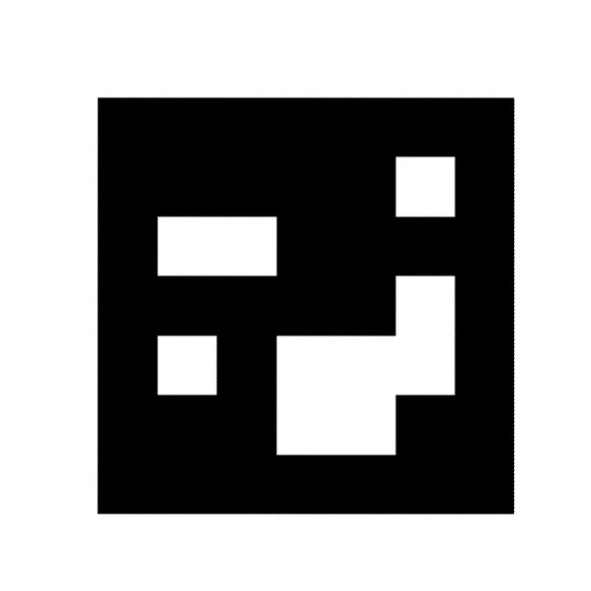

[122.0, 19.0]
[297, 297]


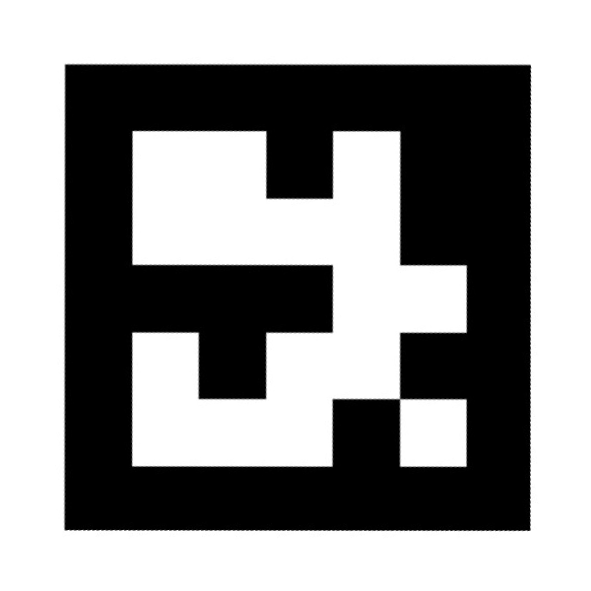

[78.0, 77.0]
[296, 296]


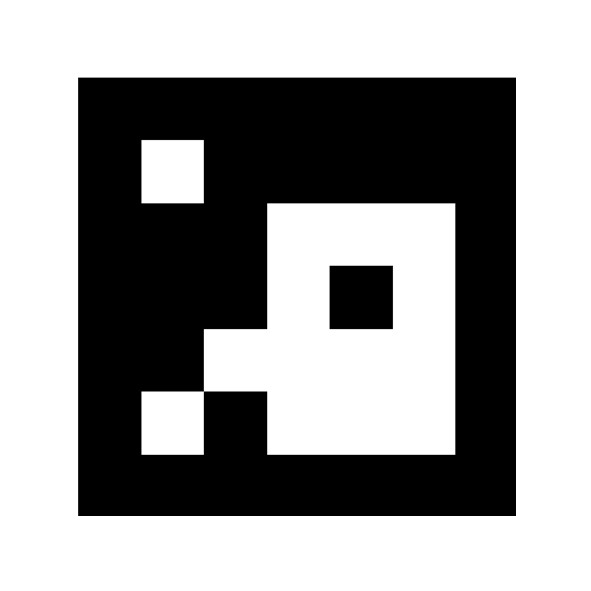

[28.0, 142.0]
[295, 297]


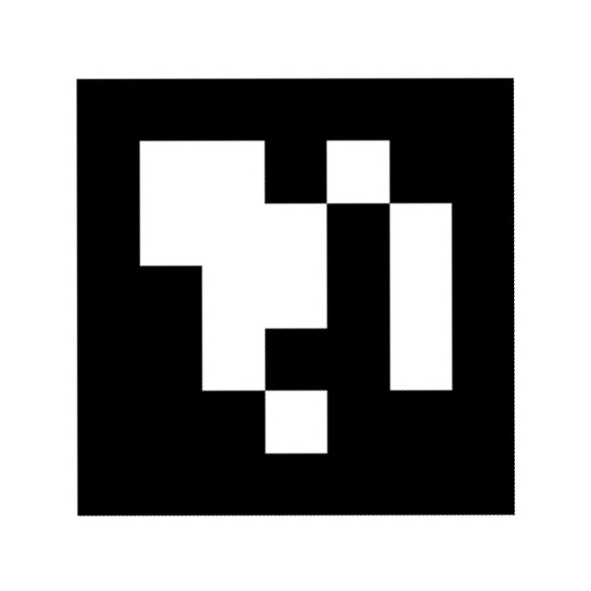

In [272]:
#Showing corrected(straight) images of aruco markers 
for i in range(1,5):
  o,c=arangle(lst[i])
  lst[i]=corr(lst[i],o,c)
  cv2_imshow(lst[i])

In [273]:
# Getting the contours present in the image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Edge detection
canny = cv2.Canny(gray,30,150)
#Thresholding
ret, thresh = cv2.threshold(gray,150,255,0)
cont, hier = cv2.findContours(canny,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

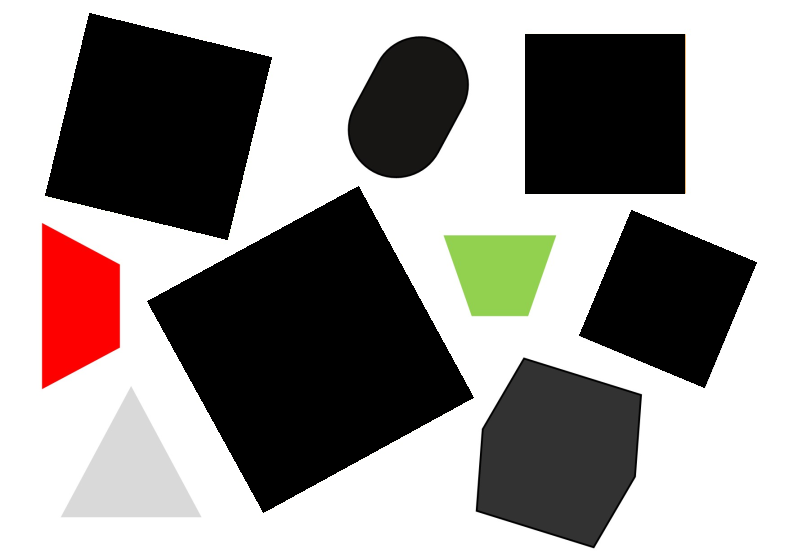

In [274]:
#Making a copy of the image for the application of the various functions not affecting the original image
img2 = img.copy()
for cnt in cont:
#Ignoring very small contours(if any) 
   if cv2.contourArea(cnt) > 1000:
        peri = cv2.arcLength(cnt,True)
        approx = cv2.approxPolyDP(cnt,peri*0.0025,True)
        #Detection of rectangular/square shapes
        if len(approx) == 4:
            
            #Getting the bounding rectangle for the rectangular shapes
            x,y,w,h = cv2.boundingRect(cnt)

            rect = cv2.minAreaRect(cnt)
            box = cv2.boxPoints(rect)
            box = np.int0(box)

            # Drawing the contours and filling it inside with black (RGB:(0,0,0)) colour
            cv2.drawContours(img2,[box],0,(0,0,0),-1)
            
            
            #Calculating the angle of the shapes with respect to their bounding rectangles 
            angle = rect[2]+90
  

    
cv2_imshow(img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [275]:

#Function for calculating the distance 
def dis(v1,v2):
    x=v1[0]-v2[0]
    x=x**2
    y=v1[1]-v2[1]
    y=y**2
    d=x+y
    d=math.sqrt(d)
    d=int(d)
    return d


In [276]:
#Resizing the corresponding marker images to fit in the square boxes
def resize(size,img):
  c,id,r=cv2.aruco.detectMarkers(img,dictionary, parameters=parameters)
  c=c[0][0]
  p1=list(c[0])
  p2=list(c[1])
  sizear=dis(p1,p2)
  #Ratio of size of square box to the size of aruco marker image
  alp=size/sizear
  sh=img.shape
  sh=list(sh)
  a=int(sh[1]*alp)
  b=int(sh[0]*alp)
  resized=cv2.resize(img,(a,b))
  # cv2_imshow(resized)
  # cv2.waitKey(0)
  # cv2.destroyAllWindows()
  return resized

In [277]:
def boundrect(img):
  c,id,r=cv2.aruco.detectMarkers(img,dictionary, parameters=parameters)
  c=c[0][0]
  v=[list(c[0]),list(c[1]),list(c[2]),list(c[3])]
  xmin=v[0][0]
  ymin=v[0][1]
  xmax=v[0][0]
  ymax=v[0][1]
  for i in v:
    if(i[0]<xmin):
      xmin=i[0]
    if(i[0]>xmax):
      xmax=i[0]
    if(i[1]<ymin):
      ymin=i[1]
    if(i[1]>ymax):
      ymax=i[1]
  xmin=int(xmin)
  ymin=int(ymin)
  xmax=int(xmax)
  ymax=int(ymax)
  an=img[ymin:ymax,xmin:xmax]
  imgcpy=img.copy()
  imgcpy1=cv2.cvtColor(imgcpy,cv2.COLOR_BGR2GRAY)
  imgcpy1=cv2.Canny(imgcpy,30,150)
  cv2_imshow(imgcpy1)
  contoursaruco,hie=cv2.findContours(imgcpy1,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
  for j in contoursaruco:
    imgcpy=cv2.drawContours(imgcpy,[j],0,(0,0,0),-1)
  ancpy=imgcpy[ymin:ymax,xmin:xmax]
  an=cv2.bitwise_xor(ancpy,an)
  #cv2_imshow(an)
  return an

3
[78.0, 77.0]
[296, 296]


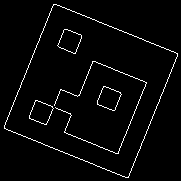

4
[76.0, 79.0]
[295, 296]


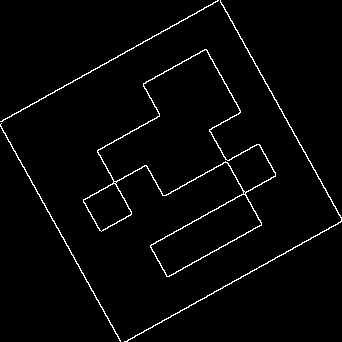

2
[65.0, 64.0]
[297, 297]


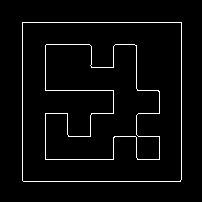

1
[98.0, 97.0]
[305, 305]


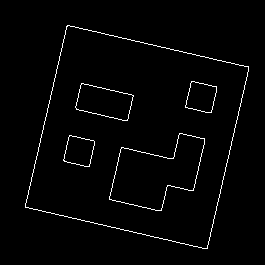

In [278]:
img2 = img.copy()
for cnt in cont:
    if cv2.contourArea(cnt) > 1000:
        peri = cv2.arcLength(cnt,True)
        approx = cv2.approxPolyDP(cnt,peri*0.0025,True)
        
        if len(approx) ==4:
            p1=approx[0][0].tolist()
            p2=approx[1][0].tolist()
            sideo=dis(p1,p2)
            
            x,y,w,h = cv2.boundingRect(cnt)
            
            c=cen([y,x],[(y+h),(x+w)])
            rgb=img2[c[0]][c[1]]
            
            rgb=tuple(rgb)
            ids=d[rgb]
            print(ids)
            rect = cv2.minAreaRect(cnt)
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            cv2.drawContours(img2,[box],0,(0,0,0),-1)
            angle = rect[2]+90
            angle=int(angle)
            ang,centre=arangle(lst[ids])
            lst[ids]=corr(lst[ids],-angle,centre)
            lst[ids]=resize(sideo,lst[ids])
            toor=boundrect(lst[ids])
            
            toor2=img2[y:y+h,x:x+w]
            shap=toor.shape
            h=shap[1]
            w=shap[0]
           
            img2[y:y+h,x:x+w]=cv2.bitwise_or(toor,img2[y:y+h,x:x+w])
            
           
            
             
  

    


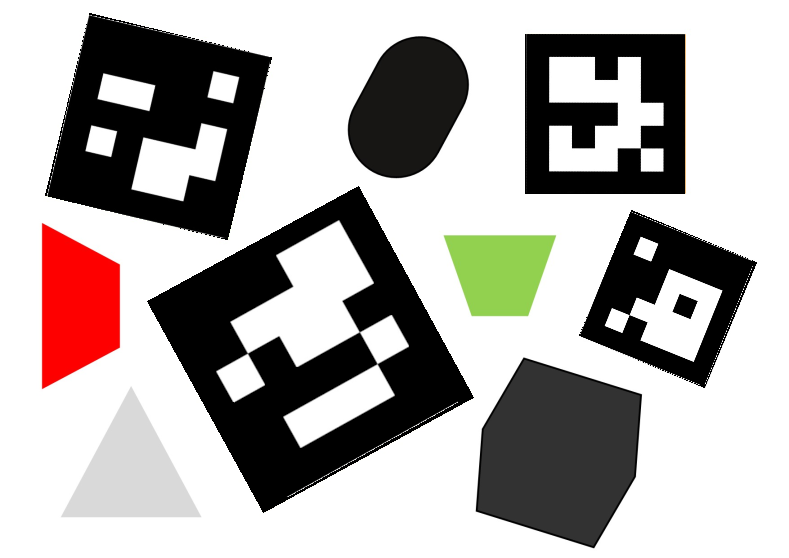

In [280]:
#Final image with aruco markers on the corresponding squares
cv2_imshow(img2)
cv2.waitKey(0)
cv2.destroyAllWindows()